## Understanding the Data

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
# Load the combined dataset
file_path = "Data/combined_cricket_stats.csv"
df = pd.read_csv(file_path)

df.head()

,Player,Country,Role,ODI_Matches,T20_Matches,Test_Matches,Inns_ODI_batting,Inns_T20_batting,Inns_Test_batting,NO_ODI,...,Econ_Test,SR_ODI_bowling,SR_T20_bowling,SR_Test_bowling,4_ODI,4_T20,4_Test,5_ODI,5_T20,5_Test
0,A Balbirnie,IRE,Batter,64,37,3,61,33,6,4,...,0.0,30.0,0.0,0.0,0,0,0,0,0,0
1,A Dananjaya,SL,All-rounder,36,22,6,27,12,10,5,...,0.0,34.7,21.7,0.0,2,0,0,2,0,0
2,A Mishra,INDIA,All-rounder,36,10,22,11,1,32,3,...,0.0,29.9,14.2,0.0,2,0,0,2,0,0
3,A Nel,SA,All-rounder,79,2,36,22,1,42,12,...,0.0,35.8,24.0,0.0,3,0,0,1,0,0
4,A Nortje,SA,All-rounder,4,1,3,1,0,6,0,...,0.0,23.6,0.0,0.0,0,0,0,0,0,0


### Intial Data Exploration

In [207]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (470, 66)


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             470 non-null    object 
 1   Country            470 non-null    object 
 2   Role               470 non-null    object 
 3   ODI_Matches        470 non-null    int64  
 4   T20_Matches        470 non-null    int64  
 5   Test_Matches       470 non-null    int64  
 6   Inns_ODI_batting   470 non-null    int64  
 7   Inns_T20_batting   470 non-null    int64  
 8   Inns_Test_batting  470 non-null    int64  
 9   NO_ODI             470 non-null    int64  
 10  NO_T20             470 non-null    int64  
 11  NO_Test            470 non-null    int64  
 12  Runs_ODI_batting   470 non-null    int64  
 13  Runs_T20_batting   470 non-null    int64  
 14  Runs_Test_batting  470 non-null    int64  
 15  HS_ODI             470 non-null    object 
 16  HS_T20             470 non

In [212]:
df.isnull().sum()

Player         0
Country        0
Role           0
ODI_Matches    0
T20_Matches    0
              ..
4_T20          0
4_Test         0
5_ODI          0
5_T20          0
5_Test         0
Length: 66, dtype: int64

In [210]:
df.drop_duplicates(inplace=True)

In [211]:
df.describe()

,ODI_Matches,T20_Matches,Test_Matches,Inns_ODI_batting,Inns_T20_batting,Inns_Test_batting,NO_ODI,NO_T20,NO_Test,Runs_ODI_batting,...,Econ_Test,SR_ODI_bowling,SR_T20_bowling,SR_Test_bowling,4_ODI,4_T20,4_Test,5_ODI,5_T20,5_Test
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0,470.000000,470.000000,470.000000
mean,63.172340,19.363830,23.072340,49.472340,13.987234,38.089362,9.285106,2.940426,4.965957,1214.474468,...,0.077128,31.954574,13.294255,1.464468,1.210638,0.151064,0.0,0.408511,0.034043,25.308511
std,61.985916,20.887187,28.483921,56.654362,18.671091,47.491223,10.197390,3.730338,8.158538,2009.924754,...,0.478012,25.818670,12.942370,9.075407,2.128168,0.484899,0.0,0.992043,0.213885,176.356614
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,18.000000,4.000000,4.000000,12.000000,2.000000,6.000000,2.000000,0.000000,0.000000,84.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,43.000000,11.000000,12.000000,30.000000,6.000000,19.000000,6.000000,2.000000,2.000000,319.000000,...,0.000000,34.900000,15.050000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,87.000000,26.000000,32.000000,65.000000,18.000000,53.750000,13.000000,4.000000,6.000000,1355.500000,...,0.000000,44.600000,21.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,463.000000,104.000000,200.000000,452.000000,96.000000,329.000000,51.000000,25.000000,89.000000,18426.000000,...,3.460000,160.200000,78.000000,63.900000,14.000000,4.000000,0.0,9.000000,2.000000,2074.000000


#### Country Feature Engineering

Ignore the 3 cells below as I have already executed and saved the new CSV file

In [92]:
# Extract country information and clean player names
def extract_country_and_clean_name(player_name):
    parts = player_name.split('(')
    name = parts[0].strip()
    country = parts[-1].replace(')', '').strip()
    return pd.Series([name, country])

df[['Player', 'Country']] = df['Player'].apply(extract_country_and_clean_name)

In [93]:
df.head()

,Player,Role,ODI_Matches,T20_Matches,Test_Matches,Inns_ODI_batting,Inns_T20_batting,Inns_Test_batting,NO_ODI,NO_T20,...,SR_ODI_bowling,SR_T20_bowling,SR_Test_bowling,4_ODI,4_T20,4_Test,5_ODI,5_T20,5_Test,Country
0,A Balbirnie,Batter,64,37,3,61.0,33,6,4.0,2,...,30.0,0.0,0.0,0,0,0.0,0,0,0.0,IRE
1,A Dananjaya,All-rounder,36,22,6,27.0,12,10,5.0,4,...,34.7,21.7,0.0,2,0,0.0,2,0,0.0,SL
2,A Mishra,All-rounder,36,10,22,11.0,1,32,3.0,0,...,29.9,14.2,0.0,2,0,0.0,2,0,0.0,INDIA
3,A Nel,All-rounder,79,2,36,22.0,1,42,12.0,1,...,35.8,24.0,0.0,3,0,0.0,1,0,0.0,SA
4,A Nortje,All-rounder,4,1,3,1.0,0,6,0.0,0,...,23.6,0.0,0.0,0,0,0.0,0,0,0.0,SA


In [95]:
df.to_csv('Updated_Cricket_Data.csv')

### Intial Feature Engineering

In [213]:
# Ensuring correct data types
numeric_cols = df.columns.drop(['Player', 'Role', 'Country'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             470 non-null    object 
 1   Country            470 non-null    object 
 2   Role               470 non-null    object 
 3   ODI_Matches        470 non-null    int64  
 4   T20_Matches        470 non-null    int64  
 5   Test_Matches       470 non-null    int64  
 6   Inns_ODI_batting   470 non-null    int64  
 7   Inns_T20_batting   470 non-null    int64  
 8   Inns_Test_batting  470 non-null    int64  
 9   NO_ODI             470 non-null    int64  
 10  NO_T20             470 non-null    int64  
 11  NO_Test            470 non-null    int64  
 12  Runs_ODI_batting   470 non-null    int64  
 13  Runs_T20_batting   470 non-null    int64  
 14  Runs_Test_batting  470 non-null    int64  
 15  HS_ODI             298 non-null    float64
 16  HS_T20             263 non

In [215]:
# Calculating performance metrics
df['Batting_Average'] = df[['Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting']].mean(axis=1)
df['Bowling_Average'] = df[['Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling']].mean(axis=1)
df['Batting_SR'] = df[['SR_ODI_batting', 'SR_T20_batting', 'SR_Test_batting']].mean(axis=1)
df['Bowling_SR'] = df[['SR_ODI_bowling', 'SR_T20_bowling', 'SR_Test_bowling']].mean(axis=1)
df['Bowling_Econ'] = df[['Econ_ODI', 'Econ_T20', 'Econ_Test']].mean(axis=1)

### Exploratory Data Analysis

#### Singular Distributions

##### Matches Played

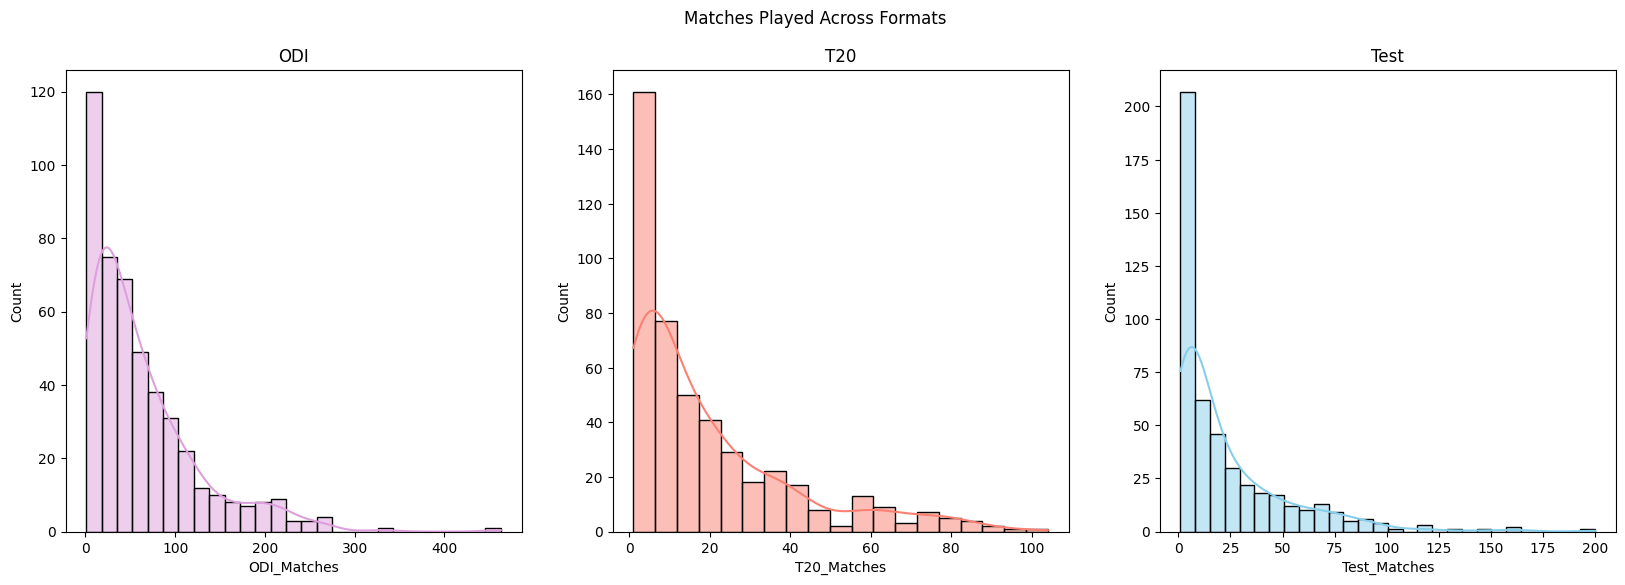

In [229]:
# Distribution of matches played across formats
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Matches Played Across Formats')

sns.histplot(df['ODI_Matches'], ax=axes[0], kde=True, label='ODI', color='plum')
axes[0].set_title("ODI")

sns.histplot(df['T20_Matches'], ax=axes[1], kde=True, label='T20', color='salmon')
axes[1].set_title("T20")

sns.histplot(df['Test_Matches'], ax=axes[2], kde=True, label='Test', color='skyblue')
axes[2].set_title("Test")

plt.show()

##### Batting Average

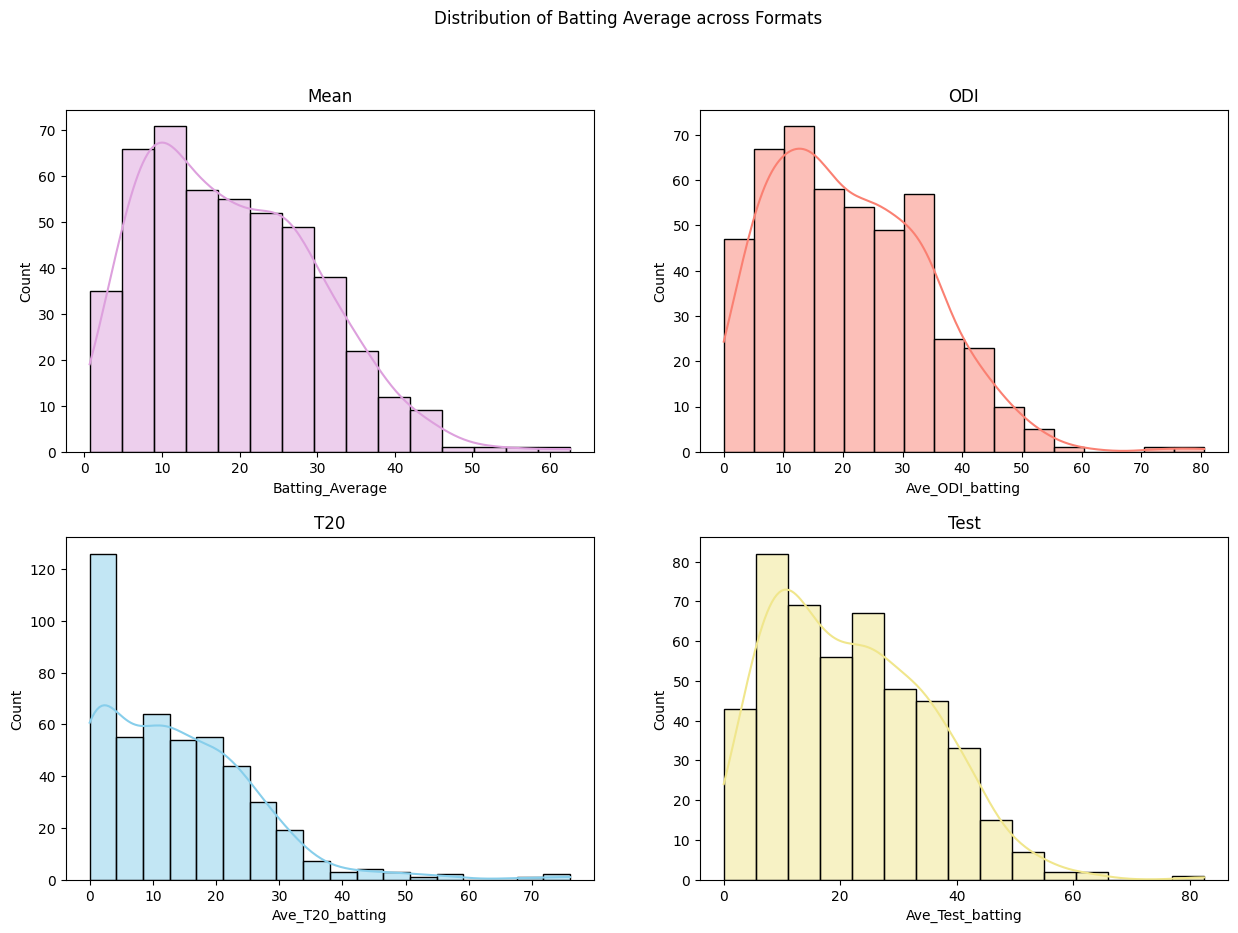

In [217]:
# Distribution of Batting Average 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Batting Average across Formats')

sns.histplot(df['Batting_Average'], ax=axes[0][0], kde=True, color='plum')
axes[0][0].set_title("Mean")

sns.histplot(df['Ave_ODI_batting'], ax=axes[0][1], kde=True, color='salmon')
axes[0][1].set_title("ODI")

sns.histplot(df['Ave_T20_batting'], ax=axes[1][0], kde=True, color='skyblue')
axes[1][0].set_title("T20",)

sns.histplot(df['Ave_Test_batting'], ax=axes[1][1], kde=True, color='khaki')
axes[1][1].set_title("Test")

plt.subplots_adjust(hspace=0.25) 
plt.show()

##### Bowling Average

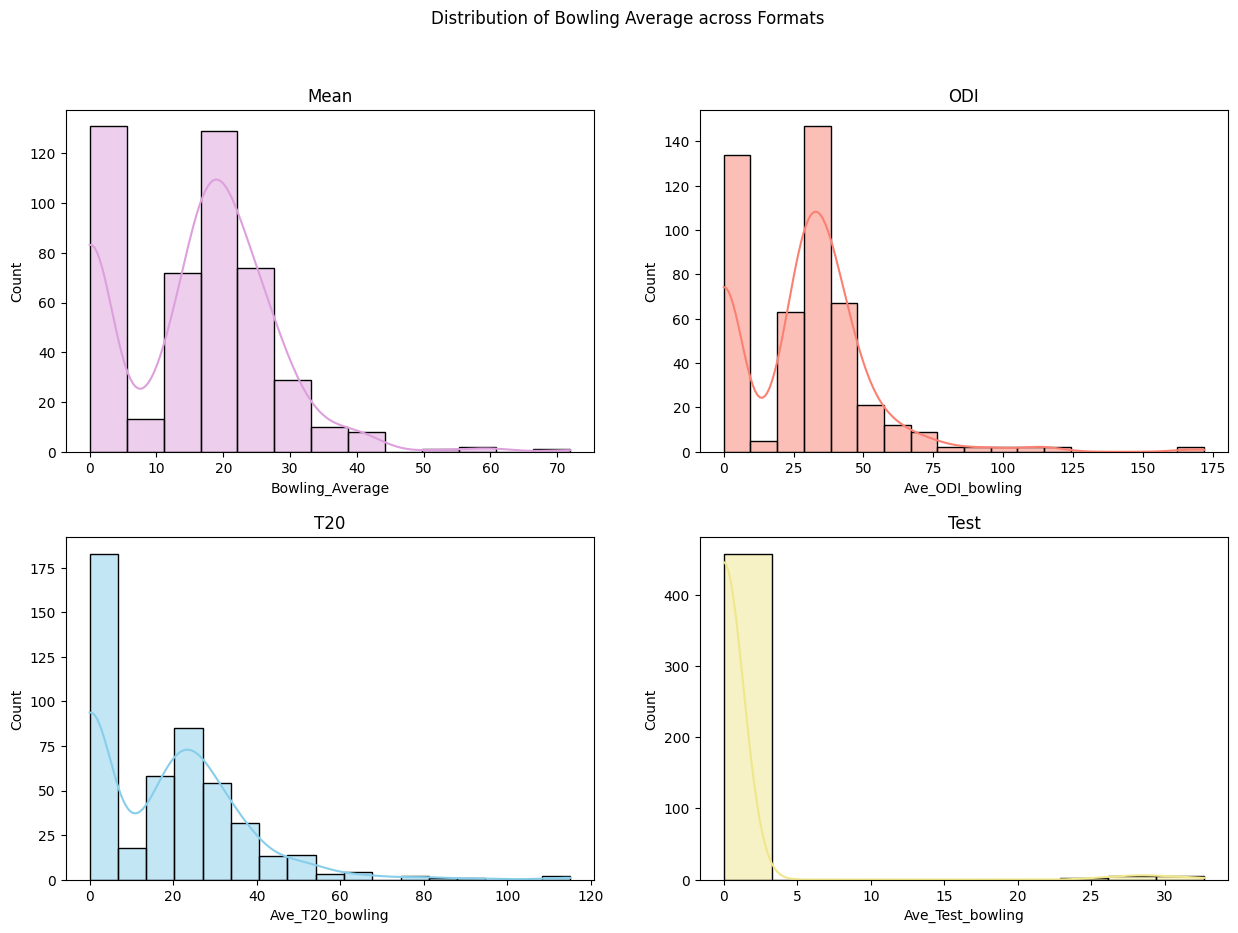

In [218]:
# Distribution of Bowling Average 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Bowling Average across Formats')

sns.histplot(df['Bowling_Average'], ax=axes[0][0], kde=True, color='plum')
axes[0][0].set_title("Mean")

sns.histplot(df['Ave_ODI_bowling'], ax=axes[0][1], kde=True, color='salmon')
axes[0][1].set_title("ODI")

sns.histplot(df['Ave_T20_bowling'], ax=axes[1][0], kde=True, color='skyblue')
axes[1][0].set_title("T20",)

sns.histplot(df['Ave_Test_bowling'], ax=axes[1][1], kde=True, color='khaki')
axes[1][1].set_title("Test")

plt.subplots_adjust(hspace=0.25) 
plt.show()

##### Batting Strike Rate

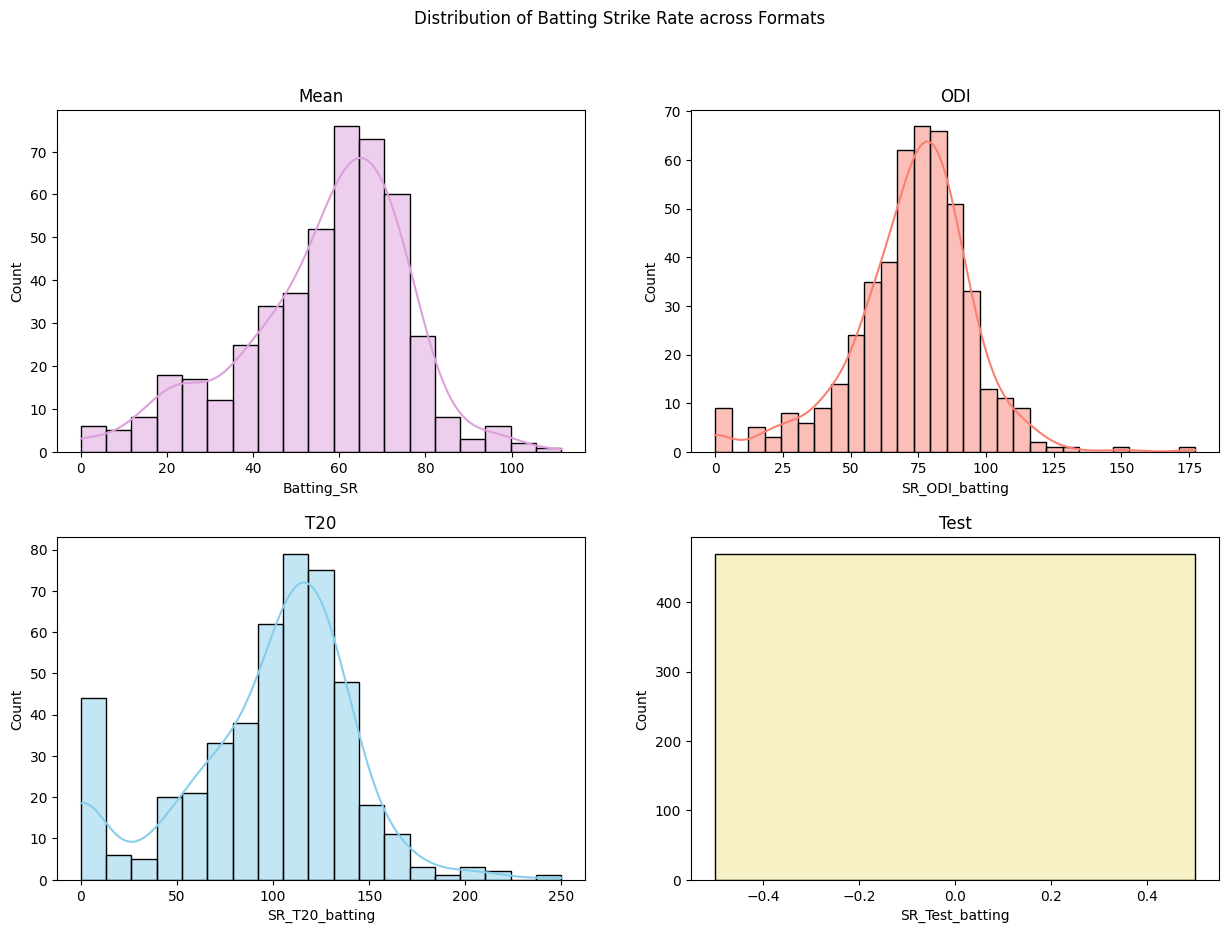

In [219]:
# Distribution of Batting Strike Rate 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Batting Strike Rate across Formats')

sns.histplot(df['Batting_SR'], ax=axes[0][0], kde=True, color='plum')
axes[0][0].set_title("Mean")

sns.histplot(df['SR_ODI_batting'], ax=axes[0][1], kde=True, color='salmon')
axes[0][1].set_title("ODI")

sns.histplot(df['SR_T20_batting'], ax=axes[1][0], kde=True, color='skyblue')
axes[1][0].set_title("T20",)

sns.histplot(df['SR_Test_batting'], ax=axes[1][1], kde=True, color='khaki')
axes[1][1].set_title("Test")

plt.subplots_adjust(hspace=0.25) 
plt.show()

##### Bowling Strike Rate

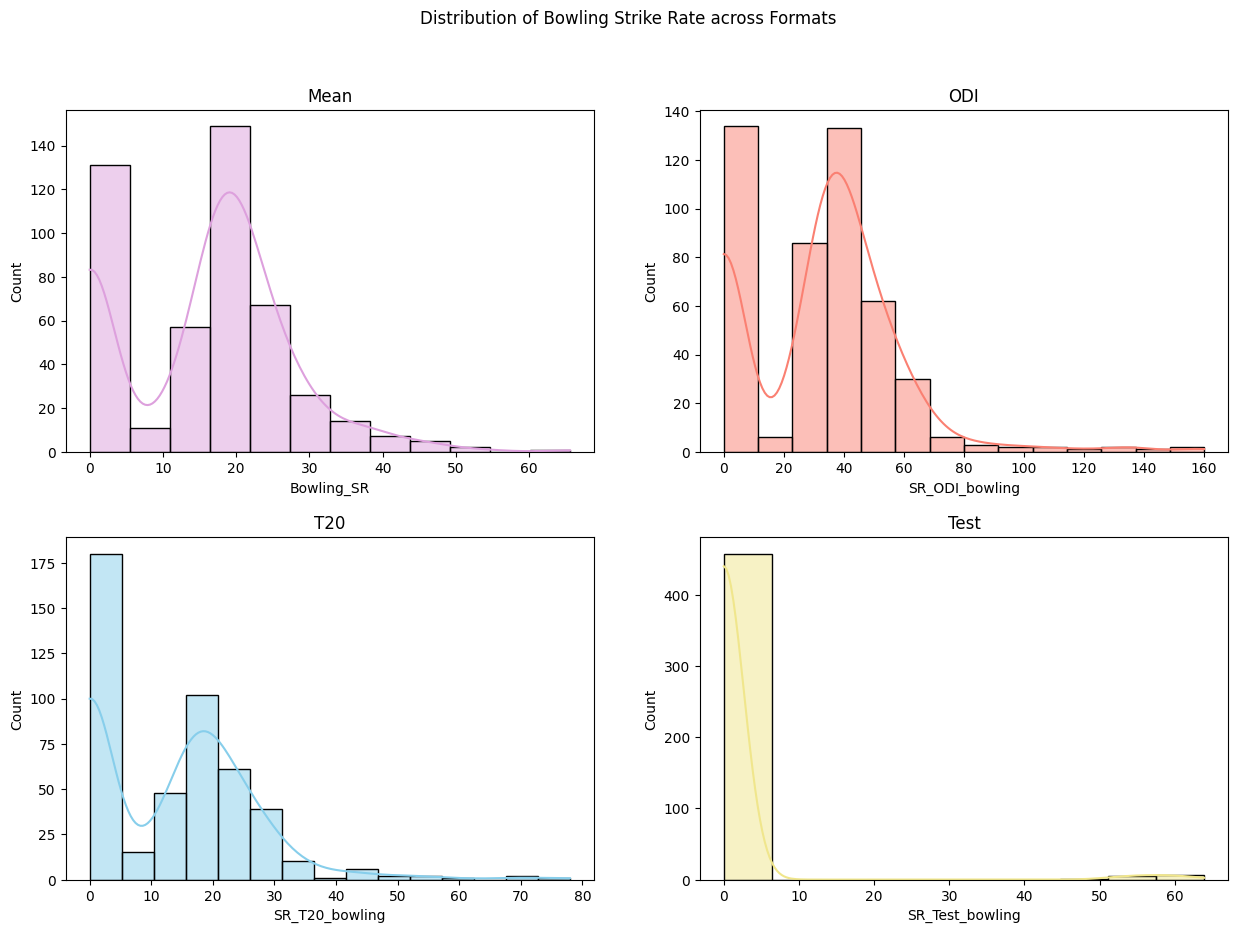

In [220]:
# Distribution of Bowling Strike Rate 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Bowling Strike Rate across Formats')

sns.histplot(df['Bowling_SR'], ax=axes[0][0], kde=True, color='plum')
axes[0][0].set_title("Mean")

sns.histplot(df['SR_ODI_bowling'], ax=axes[0][1], kde=True, color='salmon')
axes[0][1].set_title("ODI")

sns.histplot(df['SR_T20_bowling'], ax=axes[1][0], kde=True, color='skyblue')
axes[1][0].set_title("T20",)

sns.histplot(df['SR_Test_bowling'], ax=axes[1][1], kde=True, color='khaki')
axes[1][1].set_title("Test")

plt.subplots_adjust(hspace=0.25) 
plt.show()

##### Bowling Economy

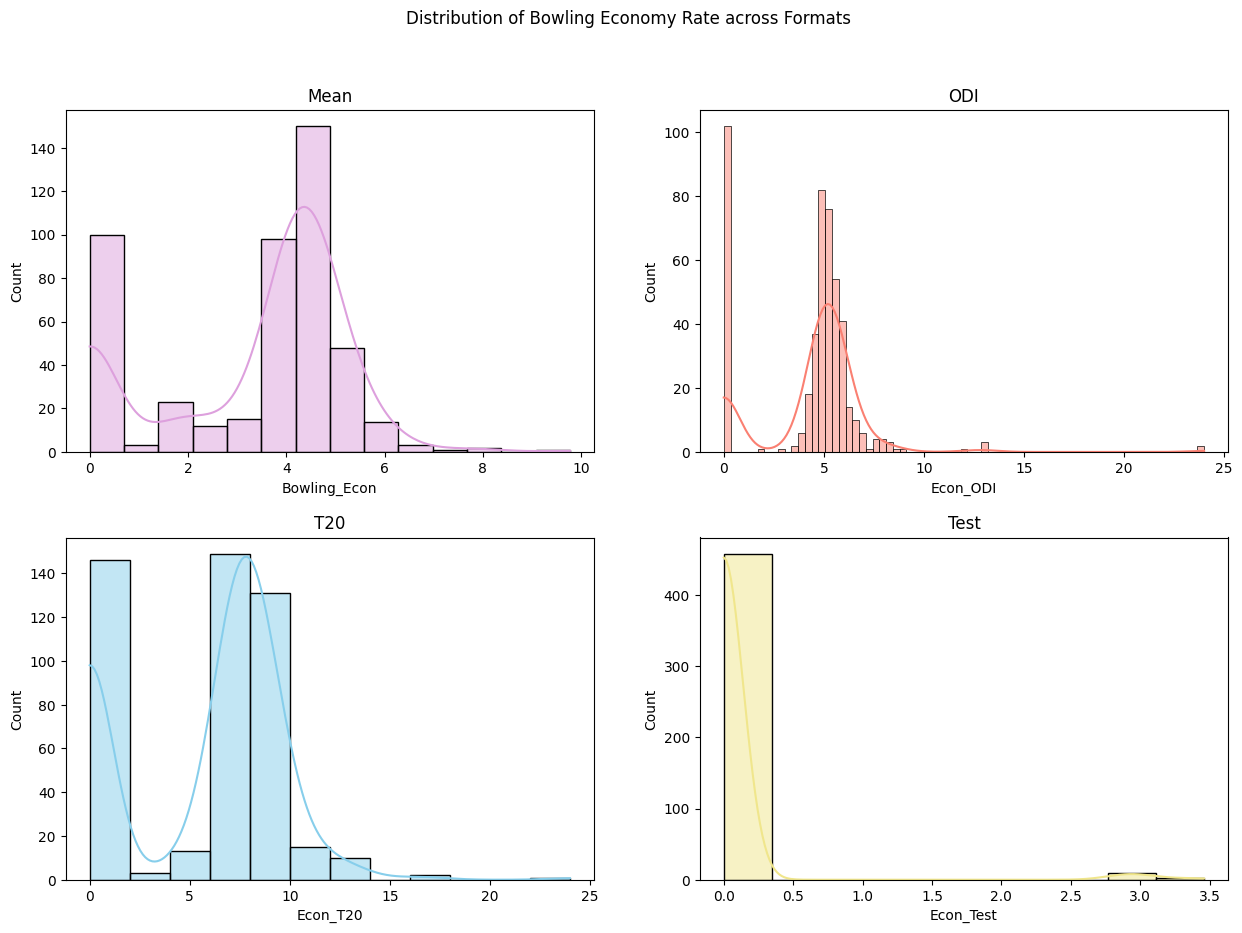

In [221]:
# Distribution of Bowling Economy 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Bowling Economy Rate across Formats')

sns.histplot(df['Bowling_Econ'], ax=axes[0][0], kde=True, color='plum')
axes[0][0].set_title("Mean")

sns.histplot(df['Econ_ODI'], ax=axes[0][1], kde=True, color='salmon')
axes[0][1].set_title("ODI")

sns.histplot(df['Econ_T20'], ax=axes[1][0], kde=True, color='skyblue')
axes[1][0].set_title("T20",)

sns.histplot(df['Econ_Test'], ax=axes[1][1], kde=True, color='khaki')
axes[1][1].set_title("Test")

plt.subplots_adjust(hspace=0.25) 
plt.show()

#### Multiple Distributions

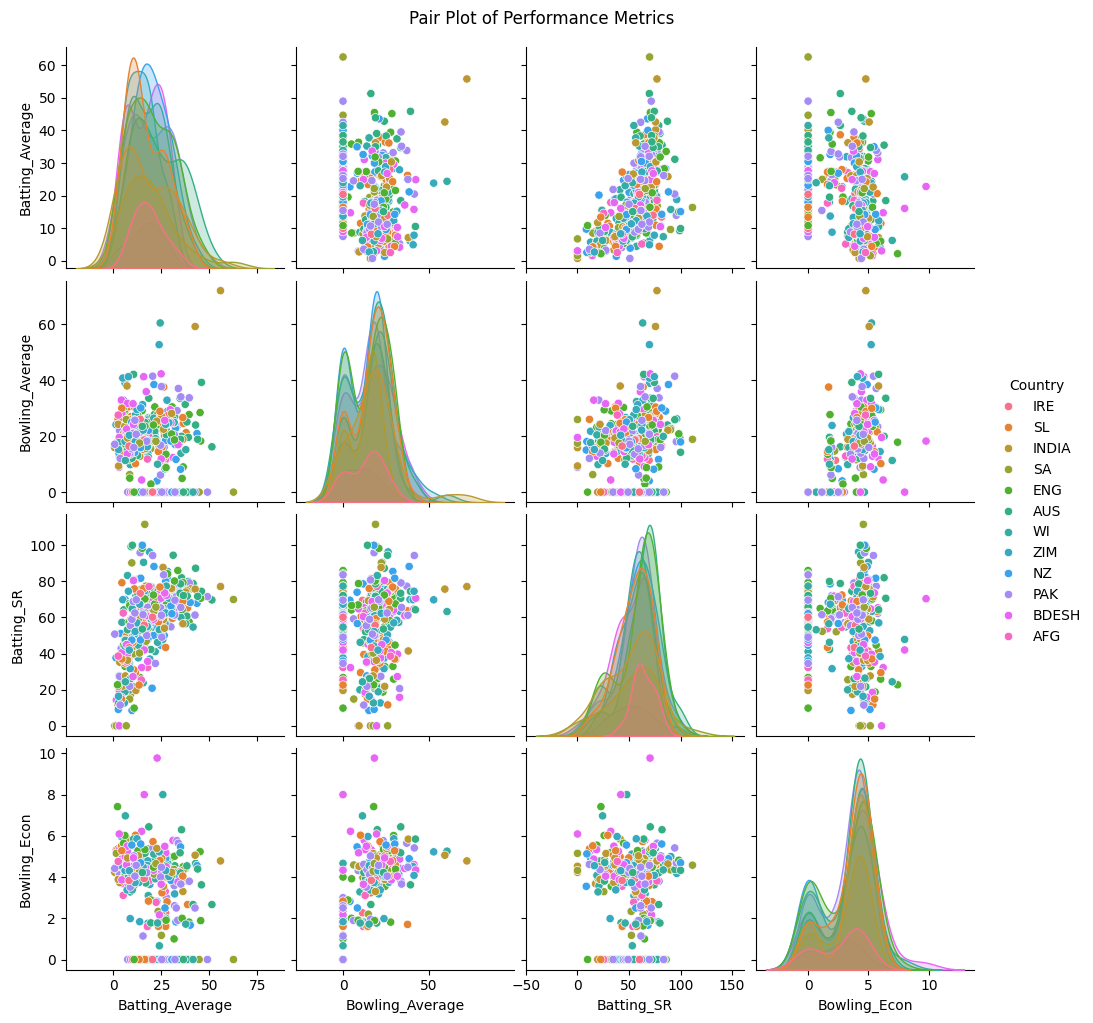

In [234]:
# Pair plot of key performance metrics
temp_df = df[['Batting_Average', 'Bowling_Average', 'Batting_SR', 'Bowling_Econ', 'Country']]
sns.pairplot(data = temp_df, hue = "Country")
plt.suptitle('Pair Plot of Performance Metrics', y=1.02)
plt.show()

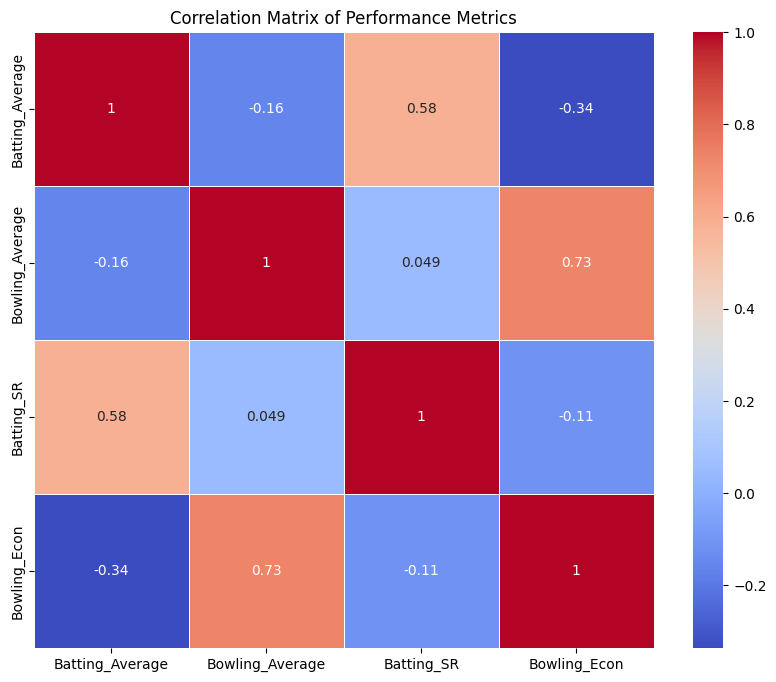

In [223]:
# Correlation Analysis
corr = df[['Batting_Average', 'Bowling_Average', 'Batting_SR', 'Bowling_Econ']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

#### More EDA

##### Role

In [192]:
# Group by Role
role_grouped = df.groupby('Role').agg({
    'Batting_Average': ['mean', 'std'],
    'Bowling_Average': ['mean', 'std'],
    'Batting_SR': ['mean', 'std'],
    'Bowling_Econ': ['mean', 'std']
}).reset_index()
print("Grouped by Role:")
role_grouped

Grouped by Role:


Role Batting_Average            Bowling_Average             \
                          mean        std            mean        std   
0  All-rounder       13.793244   8.094114       20.274027   5.993441   
1       Batter       24.091726  10.667848       11.165000  13.450364   
2       Bowler       10.435249   6.485158       21.338980   6.638682   

  Batting_SR            Bowling_Econ            
        mean        std         mean       std  
0  53.945503  21.928270     4.406667  0.643284  
1  60.052513  15.970920     2.411102  2.237738  
2  49.006667  21.400184     4.386841  0.624182

##### Country

In [193]:
country_grouped = df.groupby('Country').agg({
    'Batting_Average': ['mean', 'std'],
    'Bowling_Average': ['mean', 'std'],
    'Batting_SR': ['mean', 'std'],
    'Bowling_Econ': ['mean', 'std'],
    'ODI_Matches': 'sum',
    'T20_Matches': 'sum',
    'Test_Matches': 'sum'
}).reset_index()
print("Grouped by Country:")
country_grouped

Grouped by Country:


Country Batting_Average            Bowling_Average            Batting_SR  \
                       mean        std            mean        std       mean   
0       AFG       16.305000   8.417171       10.006000   9.771779  51.939333   
1       AUS       23.531806  12.583769       17.793750  11.082466  65.103264   
2     BDESH       16.878794   9.266771       16.042766  12.509180  51.695780   
3       ENG       19.870943  11.554875       14.595786  11.200483  59.119182   
4   ENG/IRE        8.116667        NaN       16.426667        NaN  43.303333   
5     INDIA       18.737895  13.776192       18.011711  14.924073  50.914474   
6       IRE       19.436667   7.395991       12.801667  10.319164  65.573056   
7        NZ       19.899000   9.775259       13.115533  10.477220  58.992933   
8       PAK       19.991333  11.896130       14.601533  11.875124  57.148533   
9        SA       19.227531  13.659103       12.797778   8.518906  54.436543   
10       SL       17.067754  10.108273       16.643116  10.401959  54.716522   
11       WI       18.408116   9.741751       13.589420  12.427245  54.652391   
12      ZIM       15.134921   7.856906       19.717222  12.349572  54.631825   

              Bowling_Econ           ODI_Matches T20_Matches Test_Matches  
          std         mean       std         sum         sum          sum  
0   17.123244     2.292333  1.769059         495         263           25  
1   16.882750     3.556042  1.823435        3658         872         1605  
2   18.583468     3.762340  2.277703        2149         791          683  
3   20.338565     3.193962  2.159006        2918         794         1760  
4         NaN     3.836667       NaN          73          48            3  
5   22.875497     3.583640  1.803290        3173         832         1171  
6    8.702503     2.606944  2.005456         901         557           26  
7   18.899318     3.074400  2.074958        3584        1046         1369  
8   19.450275     3.126400  1.824224        2905        1163          984  
9   26.073546     3.243086  1.786305        1511         414          564  
10  16.747336     3.556812  1.724419        3117         893         1077  
11  17.790628     3.086812  2.185273        2825         779         1249  
12  16.532264     3.540476  1.819241        2382         649          328

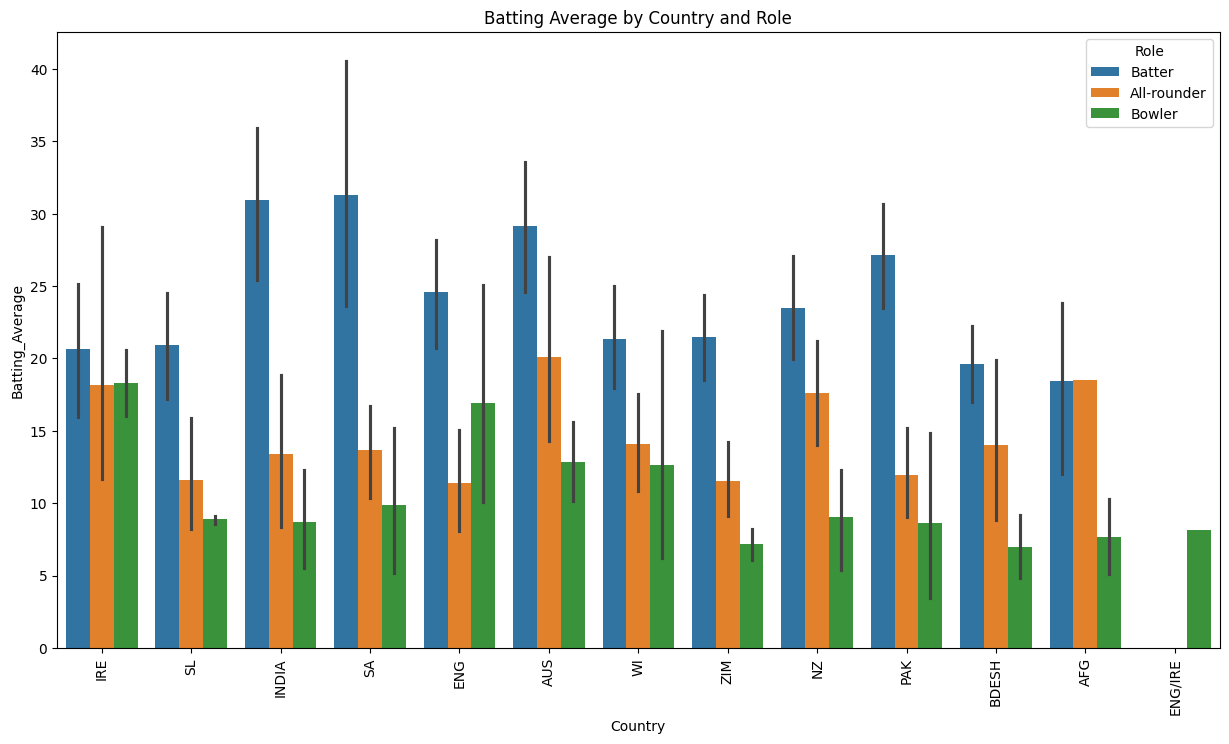

In [199]:
# Visualizations for Group By Country
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Batting_Average', data=df, hue='Role')
plt.xticks(rotation=90)
plt.title('Batting Average by Country and Role')
plt.show()

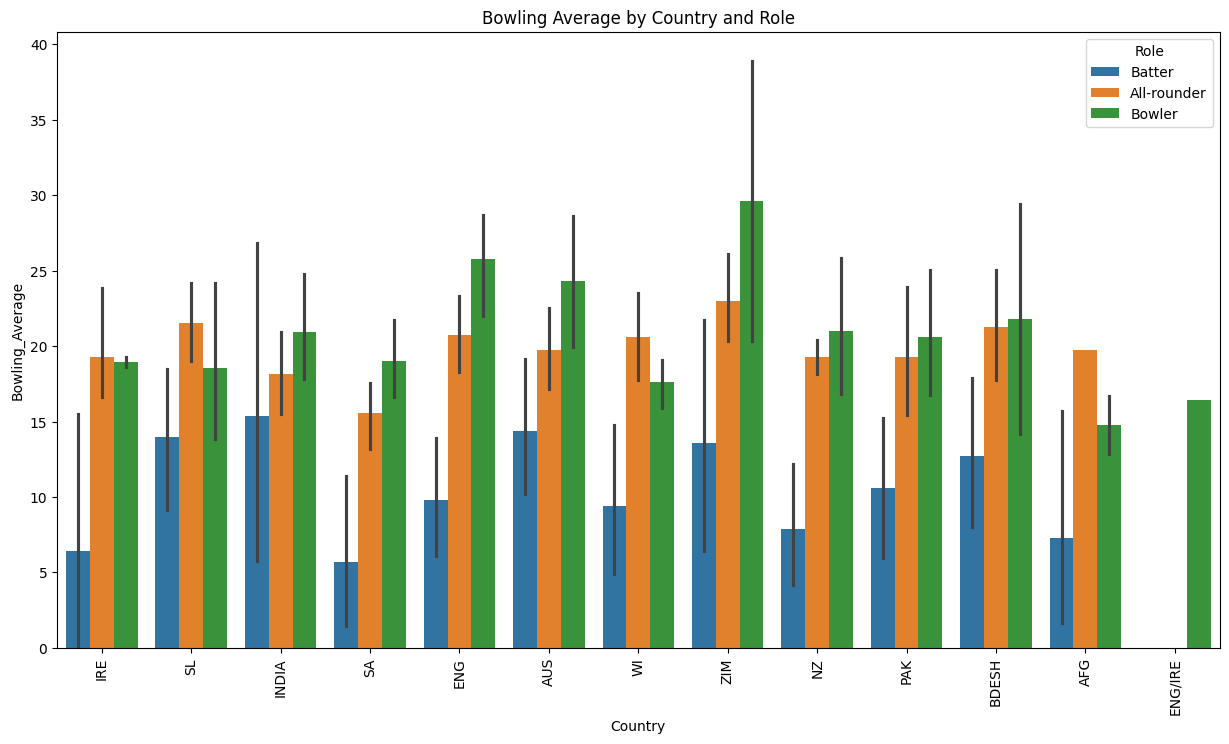

In [200]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Country', y='Bowling_Average', data=df, hue='Role')
plt.xticks(rotation=90)
plt.title('Bowling Average by Country and Role')
plt.show()


#### More Feature Engineering and EDA

In [201]:
# Creating new features for better insights
df['Batting_Consistency'] = df[['Ave_ODI_batting', 'Ave_T20_batting', 'Ave_Test_batting']].std(axis=1)
df['Bowling_Consistency'] = df[['Ave_ODI_bowling', 'Ave_T20_bowling', 'Ave_Test_bowling']].std(axis=1)

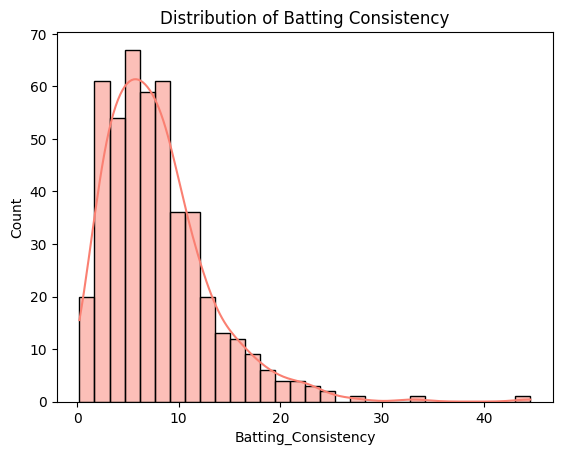

In [203]:
# Visualize new features
sns.histplot(df['Batting_Consistency'], kde=True, color='salmon')
plt.title('Distribution of Batting Consistency')
plt.show()

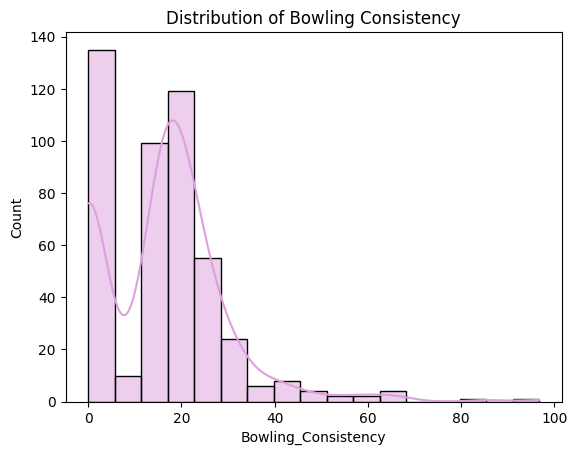

In [204]:
sns.histplot(df['Bowling_Consistency'], kde=True, color='plum')
plt.title('Distribution of Bowling Consistency')
plt.show()

#### Correlation

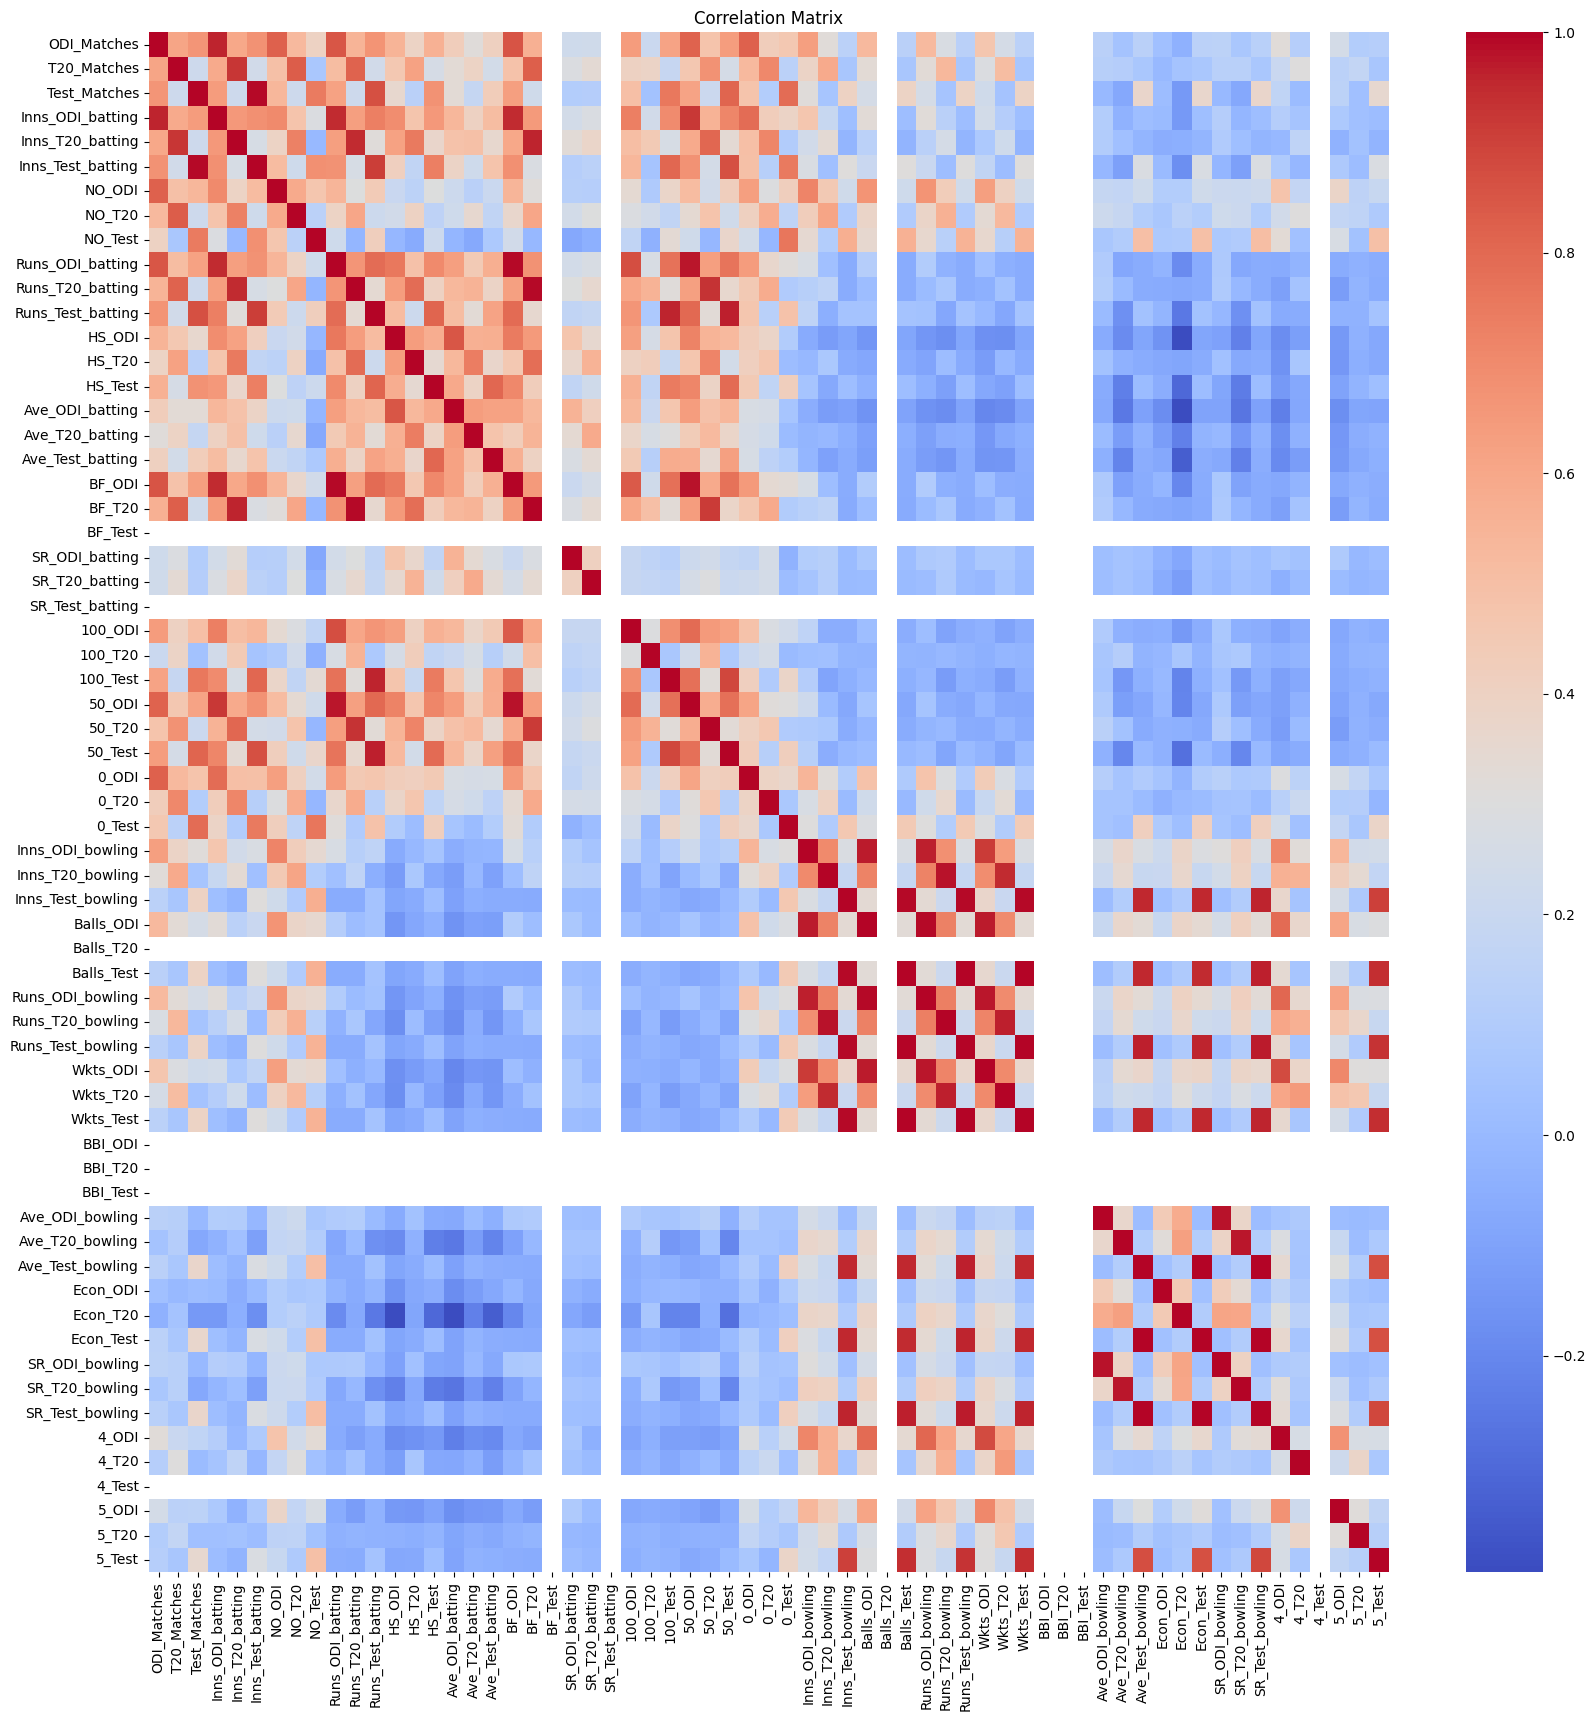

In [119]:
# Correlation Analysis
corr = df[numeric_cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()